In [2]:
%load_ext autoreload
%autoreload 2

In [75]:
import os
import sys
import json
from omegaconf import OmegaConf
import numpy as np
import pandas as pd
import torch

In [4]:
path_to_root = "/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage"
os.chdir(path_to_root)

In [6]:
sys.path.append(os.path.join(path_to_root, 'code'))

In [39]:
from model.utils import analyze_runs as ar
from model.dataset.landmark_dataset import LandmarkDataset
from model.utils.utils import load_config, load_obj
from model.utils.inference import InferenceEngine
from model.utils.evaluate import EvaluationMetrics


# Collate Run Results

Main DF:
- run name
- best epoch
- best train loss
- best val loss
- total epochs
- final train loss
- final val loss
- model
- position
- angles
- differences
- distances
- metadata
- p_rotate
- p_noise










In [10]:
run_dir = "/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/modelling/runs"

In [11]:
results_list = []
for run_name in os.listdir(run_dir):
    print(run_name)
    if run_name == 'runs':
        continue
    results = ar.make_results_row(run_dir, run_name)
    results_list.append(results)

20250603_044021_LSTM
20250604_151630_LSTM
20250604_135401_LSTM
20250603_234101_LSTM
20250604_152517_LSTM
runs
GPU_LSTM
20250604_141558_LSTM
20250603_045043_LSTM
20250604_140229_LSTM
20250604_154019_LSTM
20250604_155627_LSTM
CPU_RNN


In [12]:
pd.DataFrame(results_list)


,run_name,total_epochs,best_epoch,best_train_loss,best_val_loss,final_epoch,final_train_loss,final_val_loss,model,position,angles,differences,distances,metadata,p_rotate,p_noise
0,20250603_044021_LSTM,1,1,3.201903,3.183843,1,3.201903,3.183843,LSTMClassifier,False,True,True,True,True,0.50,0.50
1,20250604_151630_LSTM,1,1,3.200801,3.189055,1,3.200801,3.189055,LSTMClassifier,False,True,True,True,True,0.50,0.50
2,20250604_135401_LSTM,1,1,3.202323,3.190910,1,3.202323,3.190910,LSTMClassifier,False,True,True,True,True,0.50,0.50
3,20250603_234101_LSTM,1,1,3.203872,3.191935,1,3.203872,3.191935,LSTMClassifier,False,True,True,True,True,0.50,0.50
4,20250604_152517_LSTM,1,1,3.218841,3.216040,1,3.218841,3.216040,LSTMClassifier,False,False,True,True,True,0.50,0.50
5,GPU_LSTM,296,245,0.000545,0.000491,295,11.743478,11.867972,LSTMClassifier,False,True,True,True,True,0.50,0.50
6,20250604_141558_LSTM,1,1,3.202030,3.189737,1,3.202030,3.189737,LSTMClassifier,False,True,True,True,True,0.50,0.50
7,20250603_045043_LSTM,1,1,3.196299,3.183420,1,3.196299,3.183420,LSTMClassifier,False,True,True,True,True,0.50,0.50
8,20250604_140229_LSTM,1,1,3.202752,3.188052,1,3.202752,3.188052,LSTMClassifier,False,True,True,True,True,0.50,0.50
9,20250604_154019_LSTM,1,1,3.219471,3.215849,1,3.219471,3.215849,LSTMClassifier,False,False,True,True,True,0.01,0.01


# Test Best Models

Add on:
- sample acc
- sample acc topk
- series_majority acc
- series_logits acc
- series_confidence acc
- sample loss
- series_majority loss
- series_logits loss
- series_confidence loss

In [16]:
run_name = 'CPU_RNN'

Load Config

In [17]:
model_dir = os.path.join(run_dir, run_name)
config_path = os.path.join(model_dir, "config.yaml")
config = OmegaConf.load(config_path)

Load Datasets (with no augmentation)

In [29]:
for k, v in config.items():
    print(k)
    for k2, v2 in v.items():
        print(f'\t{k2}: {v2}')

general
	experiment_name: None
	author: None
optimizer
	class_name: torch.optim.AdamW
	params: {'lr': '${training.lr}', 'weight_decay': 0.001}
scheduler
	class_name: torch.optim.lr_scheduler.ReduceLROnPlateau
	params: {'mode': 'min', 'factor': 0.1, 'patience': 3}
model
	class_name: model.models.rnn_classifiers.RNNClassifier
	params: {'hidden_size': 256, 'num_layers': 2, 'num_classes': 25, 'input_size': 189}
dataset
	data_version: v4
	frame_sampling_train: {'enabled': True, 'method': 'multiple_uniform', 'params': {'frames_per_sample': 20, 'num_samples_limit': 5, 'replacement_rate': 0.2, 'include_remaining': True}}
	frame_sampling_test: {'method': 'multiple_uniform', 'params': {'frames_per_sample': 20, 'num_samples_limit': 5, 'replacement_rate': 0.2, 'include_remaining': True}}
	landmark_types: ['pose', 'right_hand', 'left_hand']
	ordering: ['features', 'landmark_types']
	paths: {'preprocessed_base': 'data/preprocessed', 'metadata_base': 'modelling/metadata', 'logs_base': '../drive/MyDri

In [114]:
metadata_path = os.path.join(
    path_to_root,
    "modelling",
    "metadata",
    )
training_metadata = pd.read_csv(os.path.join(metadata_path, f"landmarks_metadata_{config.dataset.data_version}_training.csv"))
with open(os.path.join(metadata_path, "label_encoding.json"), "r") as f:
    label_encoding = json.load(f)
class_names = [label_encoding[str(i)] for i in range(len(label_encoding))]

In [115]:
class_names

['banana', 'sopa', 'garganta', 'café', 'aniversário', 'vagina', 'animal', 'cortar', 'carne', 'jovem', 'casa', 'banheiro', 'cebola', 'sorvete', 'homem', 'ajudar', 'crescer', 'família', 'cabeça', 'pai', 'ano', 'comer', 'ouvir', 'bebê', 'filho']

In [30]:
augmentations = {
    "train": None,
    "test": None,
}

train_dataset = LandmarkDataset(
    config.dataset, config.features, augmentations, "train"
)
test_dataset = LandmarkDataset(
    config.dataset, config.features, augmentations, "test"
)

2025-06-12 11:35:22.991276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749695723.045479   13200 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749695723.073976   13200 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-12 11:35:23.348545: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
len(train_dataset), len(test_dataset)

(564, 111)

Load Model

In [41]:
checkpoint_path = os.path.join(model_dir, "best_model.pt")
checkpoint = torch.load(checkpoint_path, map_location='cpu')
model = load_obj(config.model.class_name)(**config.model.params)
model.load_state_dict(checkpoint['model_state_dict'])
model.to('cpu')

RNNClassifier(
  (rnn): GRU(189, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=25, bias=True)
)

Inference

In [42]:
sample_inference = InferenceEngine(
    model=model,
    device='cpu',
    ensemble_strategy=None
)
majority_inference = InferenceEngine(
    model=model,
    device='cpu',
    ensemble_strategy='majority'
)

In [65]:
sample_train_preds, sample_train_labels, sample_train_probs = sample_inference.predict(train_dataset, return_labels=True, return_full_probs=True)

In [154]:
np.zeros((2,1)).shape

(2, 1)

In [157]:
np.zeros((2,1), dtype=int).flatten()

array([0, 0])

In [159]:
np.bincount(np.zeros((2,1), dtype=int).flatten())

array([2])

In [162]:
np.bincount(np.array([1,2,3,4,5,6,7,7,9,10])).argmax()

7

In [165]:
maj_output = majority_inference.predict(train_dataset, return_labels=True, return_full_probs=True)

2
features torch.Size([1, 20, 189])
labels [tensor([0]), tensor([0])]
(2, 25)
(2,)
4
features torch.Size([1, 20, 189])
labels [tensor([0]), tensor([0]), tensor([0]), tensor([0])]
(4, 25)
(4,)
5
features torch.Size([1, 20, 189])
labels [tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0])]
(5, 25)
(5,)
5
features torch.Size([1, 20, 189])
labels [tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0])]
(5, 25)
(5,)
5
features torch.Size([1, 20, 189])
labels [tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0])]
(5, 25)
(5,)
3
features torch.Size([1, 20, 189])
labels [tensor([1]), tensor([1]), tensor([1])]
(3, 25)
(3,)
5
features torch.Size([1, 20, 189])
labels [tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1])]
(5, 25)
(5,)
6
features torch.Size([1, 20, 189])
labels [tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1]), tensor([1])]
(6, 25)
(6,)
5
features torch.Size([1, 20, 189])
labels [tensor([1]), tensor([1]), tensor([1]), tensor

In [170]:
maj_output[0]

(15.0, array([0]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.]))

In [174]:
maj_output[5][2].argmax()

15

In [169]:
maj_output.keys()

dict_keys([0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 120, 121, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 149])

In [ ]:
4, 9, 14, 19, 24

In [ ]:
for k in [1,2,3,4,5,6,7,8,9,10]:
    print(k, sample_test_eval.get_topk_accuracy(k))

1 0.4954954954954955
2 0.6306306306306306
3 0.6846846846846847
4 0.8198198198198198
5 0.8558558558558559
6 0.9099099099099099
7 0.9369369369369369
8 0.9459459459459459
9 0.954954954954955
10 0.963963963963964


In [55]:
sample_test_preds, sample_test_labels, sample_test_probs = sample_inference.predict(test_dataset, return_labels=True, return_full_probs=True)

In [ ]:
majority_test_preds, majority_test_labels, majority_test_probs = majority_inference.predict(test_dataset, return_labels=True, return_full_probs=True)

In [71]:
sample_train_preds.shape, sample_train_labels.shape, sample_train_probs.shape

((564,), (564,), (564, 25))

In [72]:
sample_test_preds.shape, sample_test_labels.shape, sample_test_probs.shape

((111,), (111,), (111, 25))

Evaluate

In [116]:
label_encoding

{'15': 'ajudar', '6': 'animal', '4': 'aniversário', '20': 'ano', '0': 'banana', '11': 'banheiro', '23': 'bebê', '18': 'cabeça', '3': 'café', '8': 'carne', '10': 'casa', '12': 'cebola', '21': 'comer', '7': 'cortar', '16': 'crescer', '17': 'família', '24': 'filho', '2': 'garganta', '14': 'homem', '9': 'jovem', '22': 'ouvir', '19': 'pai', '1': 'sopa', '13': 'sorvete', '5': 'vagina'}

In [117]:
label_decoding = {v: k for k, v in label_encoding.items()}

In [118]:
label_decoding

{'ajudar': '15', 'animal': '6', 'aniversário': '4', 'ano': '20', 'banana': '0', 'banheiro': '11', 'bebê': '23', 'cabeça': '18', 'café': '3', 'carne': '8', 'casa': '10', 'cebola': '12', 'comer': '21', 'cortar': '7', 'crescer': '16', 'família': '17', 'filho': '24', 'garganta': '2', 'homem': '14', 'jovem': '9', 'ouvir': '22', 'pai': '19', 'sopa': '1', 'sorvete': '13', 'vagina': '5'}

In [119]:
label_remapping = {i: int(label_decoding[label]) for i, label in enumerate(sorted(class_names))}
label_remapping

{0: 15, 1: 6, 2: 4, 3: 20, 4: 0, 5: 11, 6: 23, 7: 18, 8: 3, 9: 8, 10: 10, 11: 12, 12: 21, 13: 7, 14: 16, 15: 17, 16: 24, 17: 2, 18: 14, 19: 9, 20: 22, 21: 19, 22: 1, 23: 13, 24: 5}

In [120]:
sample_train_labels_r = [label_remapping[label] for label in sample_train_labels]
sample_test_labels_r = [label_remapping[label] for label in sample_test_labels]

In [121]:
sample_train_preds

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [123]:
sample_train_labels_r

[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 21, 21, 

In [130]:
sample_train_eval = EvaluationMetrics(
    sample_train_preds,
    sample_train_labels_r,
    sample_train_probs,
    num_classes=25,
    class_names=class_names
)

# majority_train_eval = EvaluationMetrics(
#     majority_train_preds,
#     majority_train_labels,
#     majority_train_probs,
#     num_classes=25,
#     class_names=class_names
# )

sample_test_eval = EvaluationMetrics(
    sample_test_preds,
    sample_test_labels_r,
    sample_test_probs,
    num_classes=25,
    class_names=class_names
)

# majority_test_eval = EvaluationMetrics(
#     majority_test_preds,
#     majority_test_labels,
#     majority_test_probs,
#     num_classes=25,
#     class_names=class_names
# )

In [137]:
sample_train_eval.accuracy

1.0

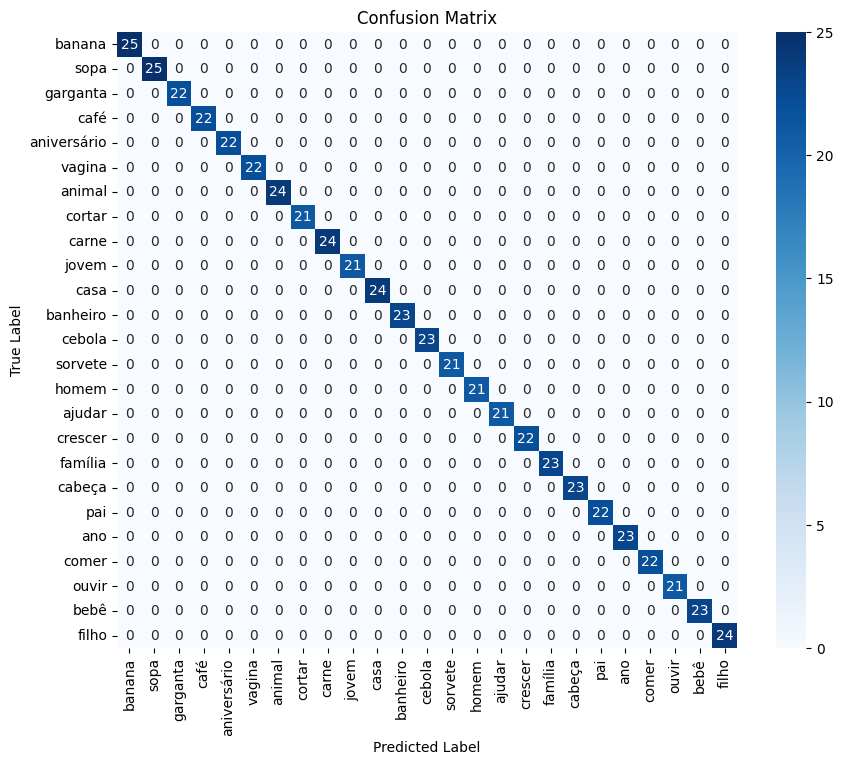

In [128]:
sample_train_eval.plot_confusion_matrix()

In [136]:
sample_test_eval.accuracy

0.4954954954954955

In [146]:
for k in [1,2,3,4,5,6,7,8,9,10]:
    print(k, sample_test_eval.get_topk_accuracy(k))

1 0.4954954954954955
2 0.6306306306306306
3 0.6846846846846847
4 0.8198198198198198
5 0.8558558558558559
6 0.9099099099099099
7 0.9369369369369369
8 0.9459459459459459
9 0.954954954954955
10 0.963963963963964


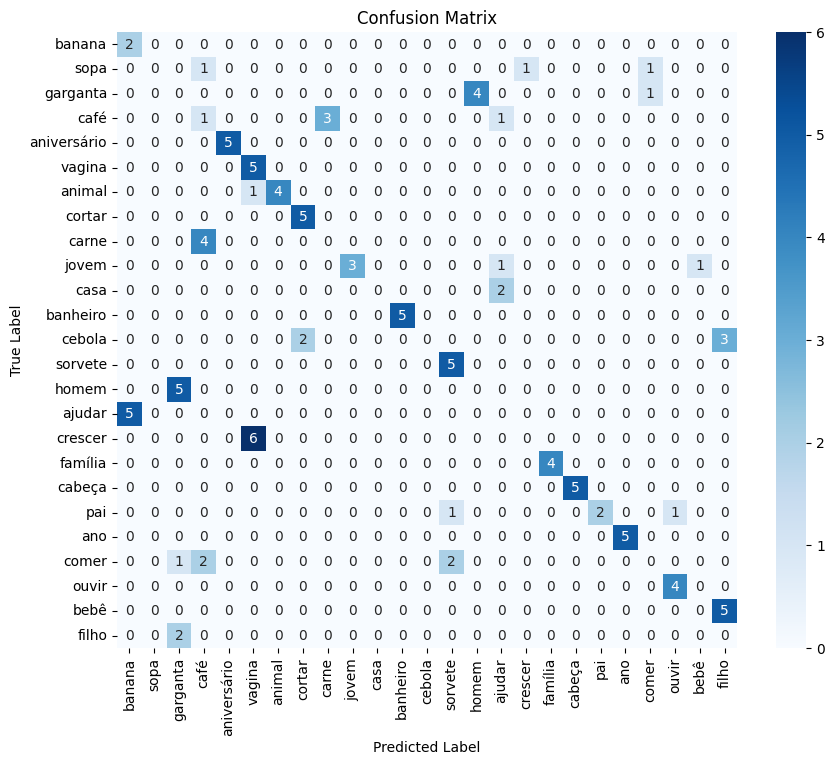

In [131]:
sample_test_eval.plot_confusion_matrix()